In [26]:
# Run this cell to import the packages you'll need and set a seed
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
#importing of seaborn
import seaborn as sns
%matplotlib inline

# Please dont change this--otherwise, you'll get different results from everyone else!
np.random.seed(1547)

# Question 1 :Write a query (or queries) that compares the average amount of investment raised by companies in SF per quarter to companies in NYC.


In [ ]:
SELECT company_city, avg
FROM (SELECT company_city, AVG(raised_amount_usd) AS avg FROM tutorial.crunchbase_investments
WHERE raised_amount_usd IS NOT NULL
GROUP BY company_city
) AS subquery
WHERE subquery.company_city = 'New York' OR subquery.company_city = 'San Francisco'

# Question 2 : Which top 3 categories of crime are most likely to go unresolved in Mission District?

In [2]:
SELECT category, COUNT(category) AS count FROM tutorial.sf_crime_incidents_cleandate
WHERE resolution = 'NONE' AND pd_district = 'MISSION'
GROUP BY category
ORDER BY count DESC
LIMIT 3

SyntaxError: invalid syntax (<ipython-input-2-d2d872449983>, line 1)

# Question 3: Companies from which 10 cities have the highest average acquisition amount?

In [ ]:
SELECT city, avg(price_amount) average FROM tutorial.crunchbase_companies companies
JOIN tutorial.crunchbase_acquisitions acquisitions ON companies.name=acquisitions.company_name
WHERE price_amount > 0
GROUP BY city
ORDER BY average DESC
LIMIT 10

# Question 4: Player names, player hometowns, school names, player positions, and school conferences for all players with position ‘QB’ or ‘WR’

In [1]:
SELECT player_name, hometown, players.school_name, position, conference FROM benn.college_football_players players
JOIN benn.college_football_teams teams ON players.school_name = teams.school_name
WHERE position = 'QB' OR position = 'WR'

SyntaxError: invalid syntax (<ipython-input-1-895febb0f8ae>, line 1)

# Question 5: In SF, what pd_district am I most likely to have my car stolen, and on what day of the week is this most likely?

In [3]:
SELECT pd_district, COUNT(pd_district) AS district_count FROM tutorial.sf_crime_incidents_cleandate
WHERE category = 'VEHICLE THEFT'
GROUP BY pd_district
ORDER BY district_count DESC


#NEXT QUERY START

SELECT day_of_week, COUNT(day_of_week) AS day_count FROM tutorial.sf_crime_incidents_cleandate
WHERE category = 'VEHICLE THEFT'
GROUP BY day_of_week
ORDER BY day_count DESC

SyntaxError: invalid syntax (<ipython-input-3-f6e309c33886>, line 1)

# FINAL QUESTION : For companies in SF with names that start with the letter ‘A’, what percentage of companies raise a funding total between \$25 and \$30 million? Create a visualization that shows this on a graph of a normal distribution.

In [5]:
SELECT company_name, sum(raised_amount_usd) FROM tutorial.crunchbase_investments
WHERE substr(company_name, 1, 1) = 'a' AND company_city = 'San Francisco'
GROUP BY company_name

SyntaxError: invalid syntax (<ipython-input-5-5b1be7fa6d37>, line 1)

In [11]:
#improting data for analysus
funding_df= pd.read_csv('datasets/funding.csv')
funding_df

,company_name,sum
0,adBrite,66000000.0
1,awe.sm,24250000.0
2,adRise,2000000.0
3,about.me,22700000.0


In [12]:
#getting descriiptive stats and figures
funding_df.describe()

,sum
count,4.000000e+00
mean,2.873750e+07
std,2.683267e+07
min,2.000000e+06
25%,1.752500e+07
50%,2.347500e+07
75%,3.468750e+07
max,6.600000e+07


In [15]:
#functions for sampling and Normal distrubution *REFERENCE NOTEBOOK #3*

# Complete the two functions below. In progress to be done by class

def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    #delcare as a normal array first for ease of operations
    sample_list = []
    
    for samp_data in range(n):
        random_number = random.choice(dataset)
        sample_list.append(random_number)

    sample_mean = np.mean(sample_list)
    return sample_mean
    

def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    #for later use if needed
    sample_set= dataset
    #declare as a normal array first since np.array doesnt deal with append method and we may need this
    sample_dist_array = []
    #based on entered loop size appends that many means to the array
    for i in range(size):
        sample_dist_array.append(get_sample(sample_set))
    #may be unnecesary but keeps me organized
    sample_dist = sample_dist_array
    return sample_dist

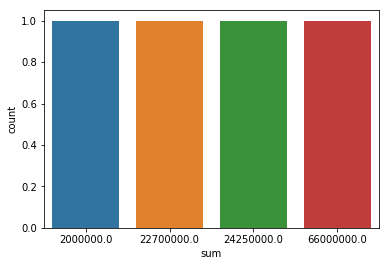

In [28]:

sns.countplot(x='sum', data=funding_df)

(array([  4.,   6.,  11.,  20.,  11.,  16.,  12.,  12.,   5.,   3.]),
 array([ 19698333.33333333,  21417666.66666666,  23137000.        ,
         24856333.33333333,  26575666.66666666,  28295000.        ,
         30014333.33333333,  31733666.66666666,  33453000.        ,
         35172333.33333333,  36891666.66666666]),
 <a list of 10 Patch objects>)

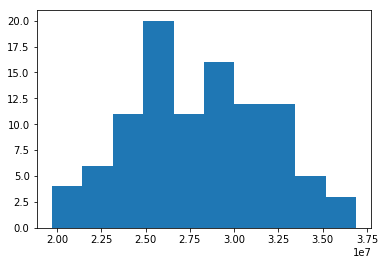

In [36]:
plt.hist(create_sample_distribution(funding_df["sum"]))
#unlike in seaborn, dot notiation for the  columns doesnt work so must be in [] form

# 